---
title: PA 3 Data Visualization Using plotnine
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
---

## Overview

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [1]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)


In [2]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [3]:
%matplotlib inline
import plotnine as p9

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [7]:


# Convert the other variables below

## Activity 1

If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

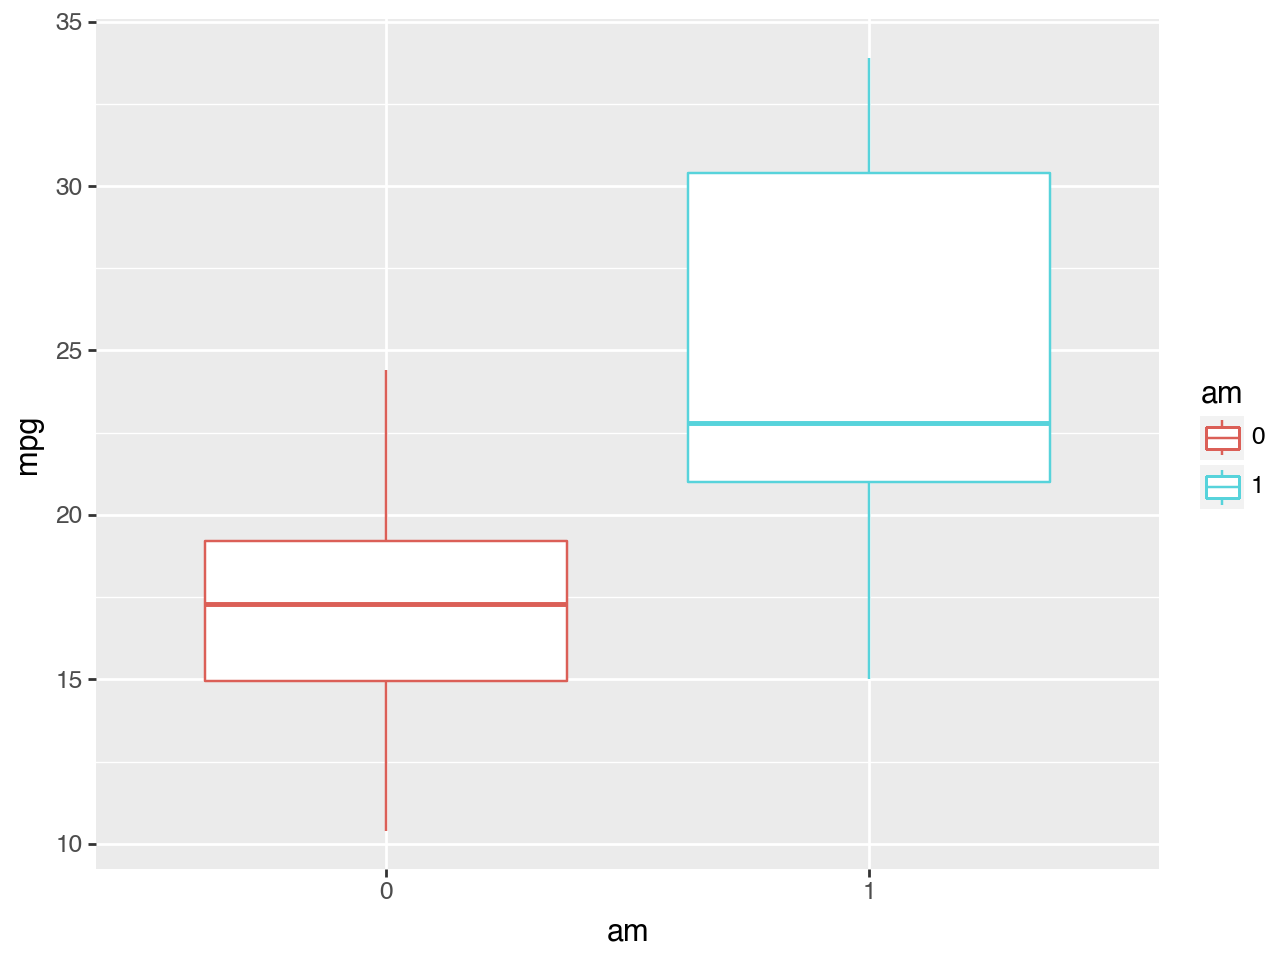

In [4]:
# Create plot for (1) here
df["am"] = df["am"].astype(str)
(p9.ggplot(df)) + (p9.aes(x="am", y="mpg",color ="am" ))+ (p9.geom_boxplot())

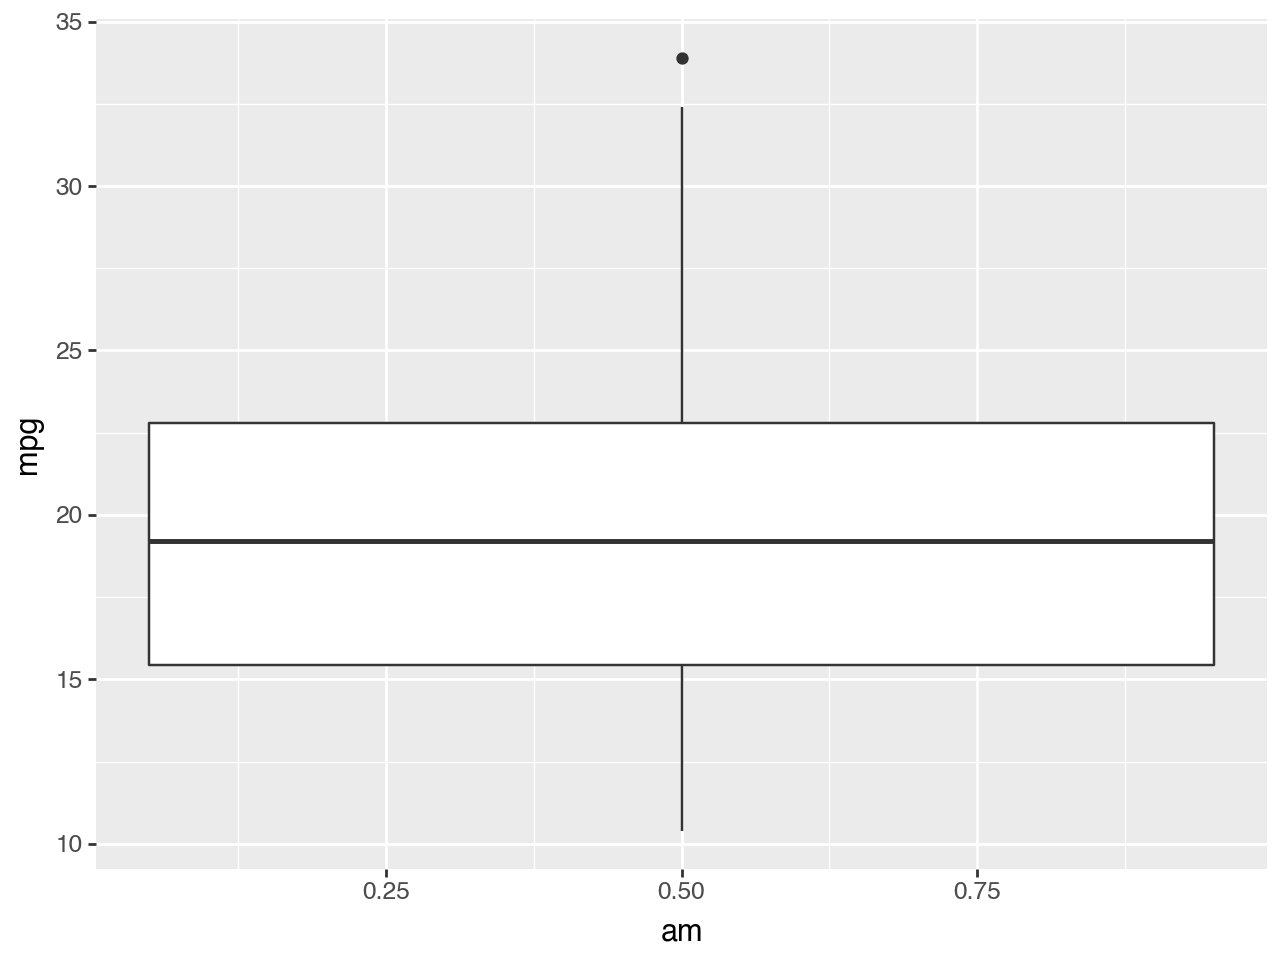

In [5]:
df["am"] = df["am"].astype(float)
(p9.ggplot(df)) + (p9.aes(x="am", y="mpg")) + (p9.geom_boxplot())

In the second plot, the two boxplots become one due to the fact that the catrgorical variable "am" is converted into a numerical, continuous variable.

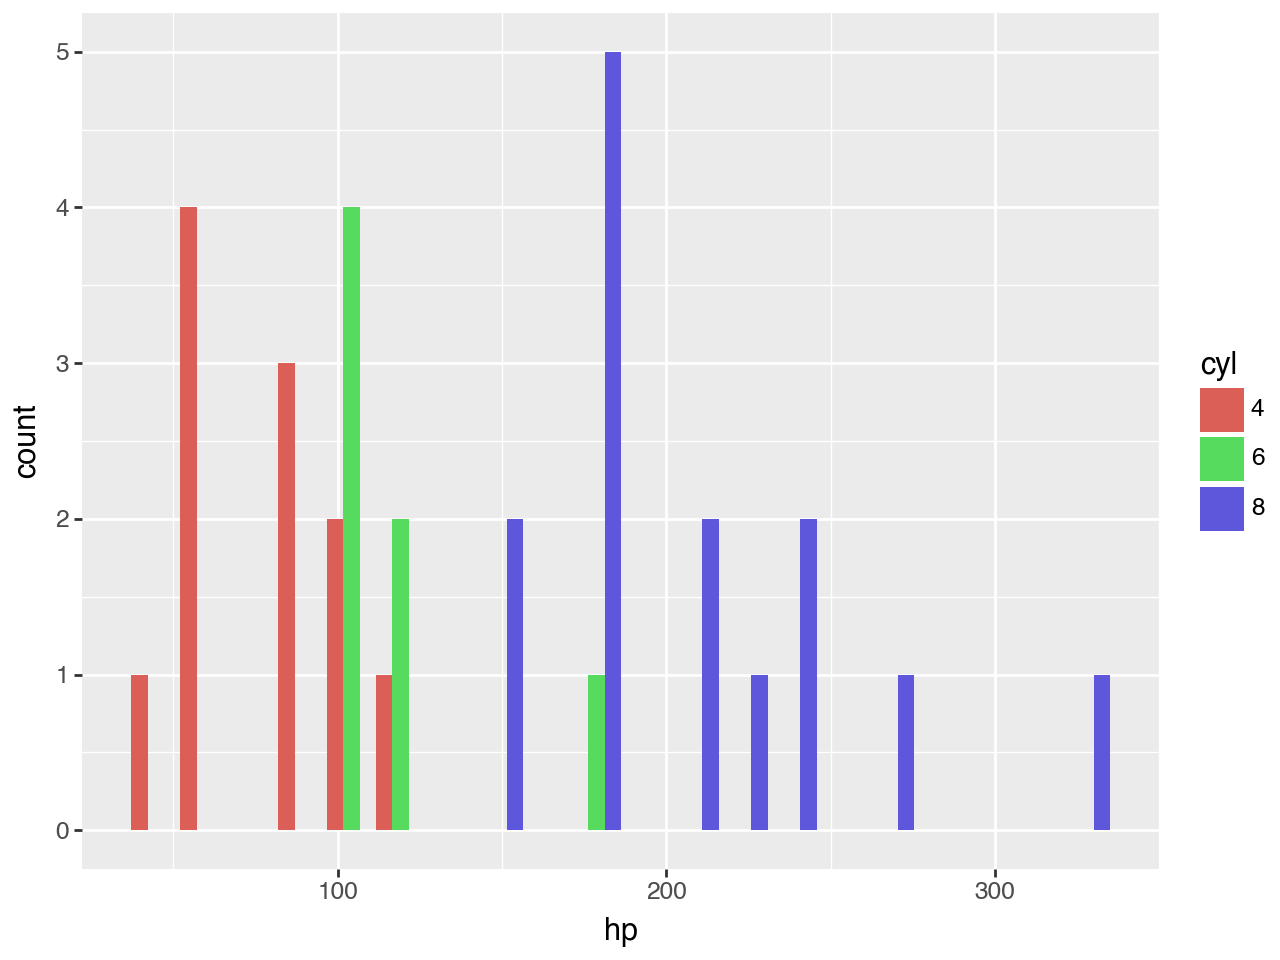

In [6]:
# Create plot for (2) here
df["cyl"] = df["cyl"].astype(str)
(p9.ggplot(df)) + (p9.aes(x="hp", fill = "cyl")) + (p9.geom_histogram(bins=20, position= "dodge"))

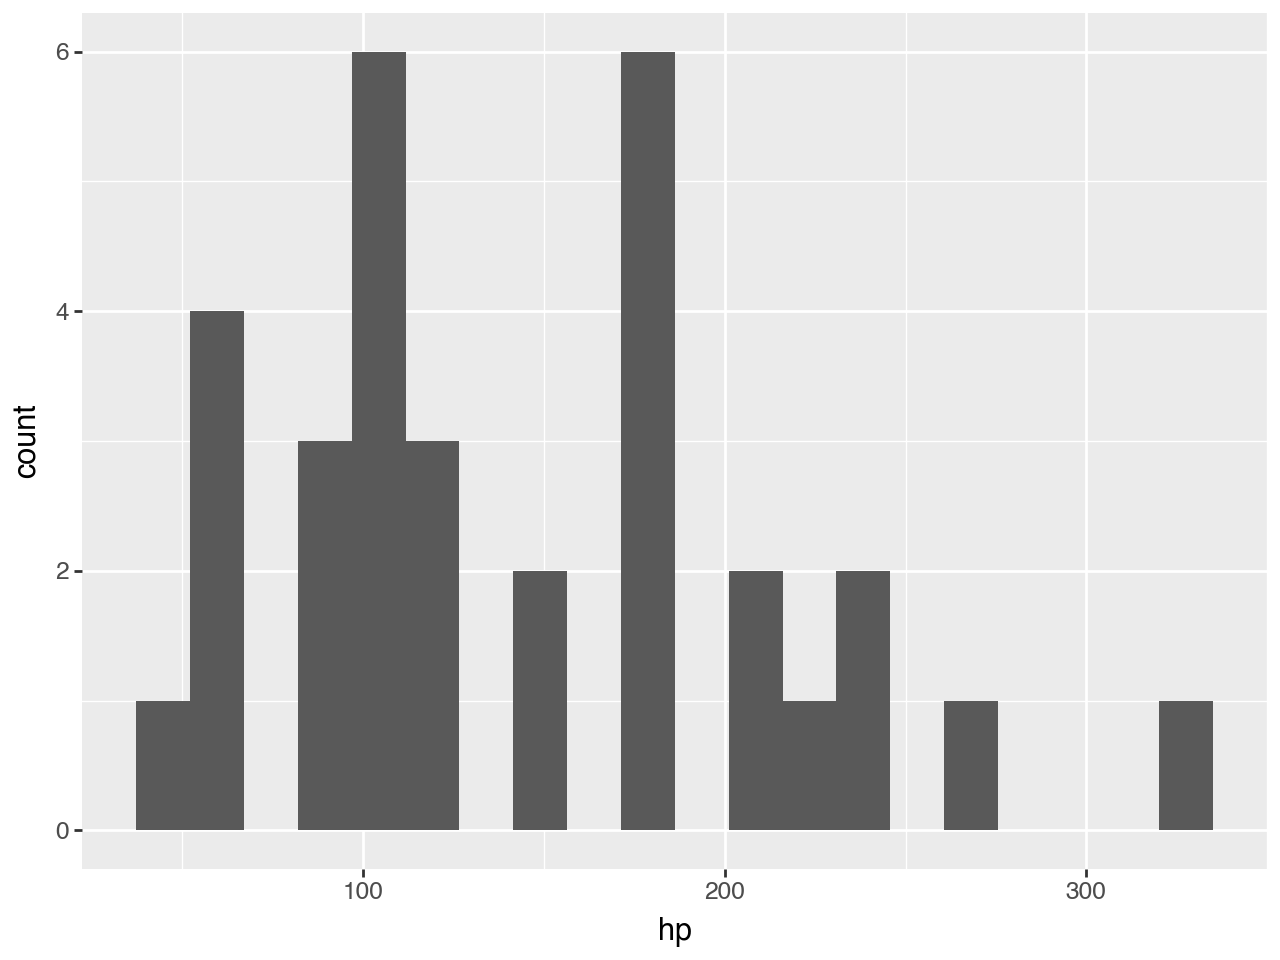

In [7]:
df["cyl"] = df["cyl"].astype(float)
(p9.ggplot(df)) + (p9.aes(x="hp", fill = "cyl")) + (p9.geom_histogram(bins=20, position= "dodge"))

The fill function does not work with float variables resulting in no fill effect.

## Activity 2

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


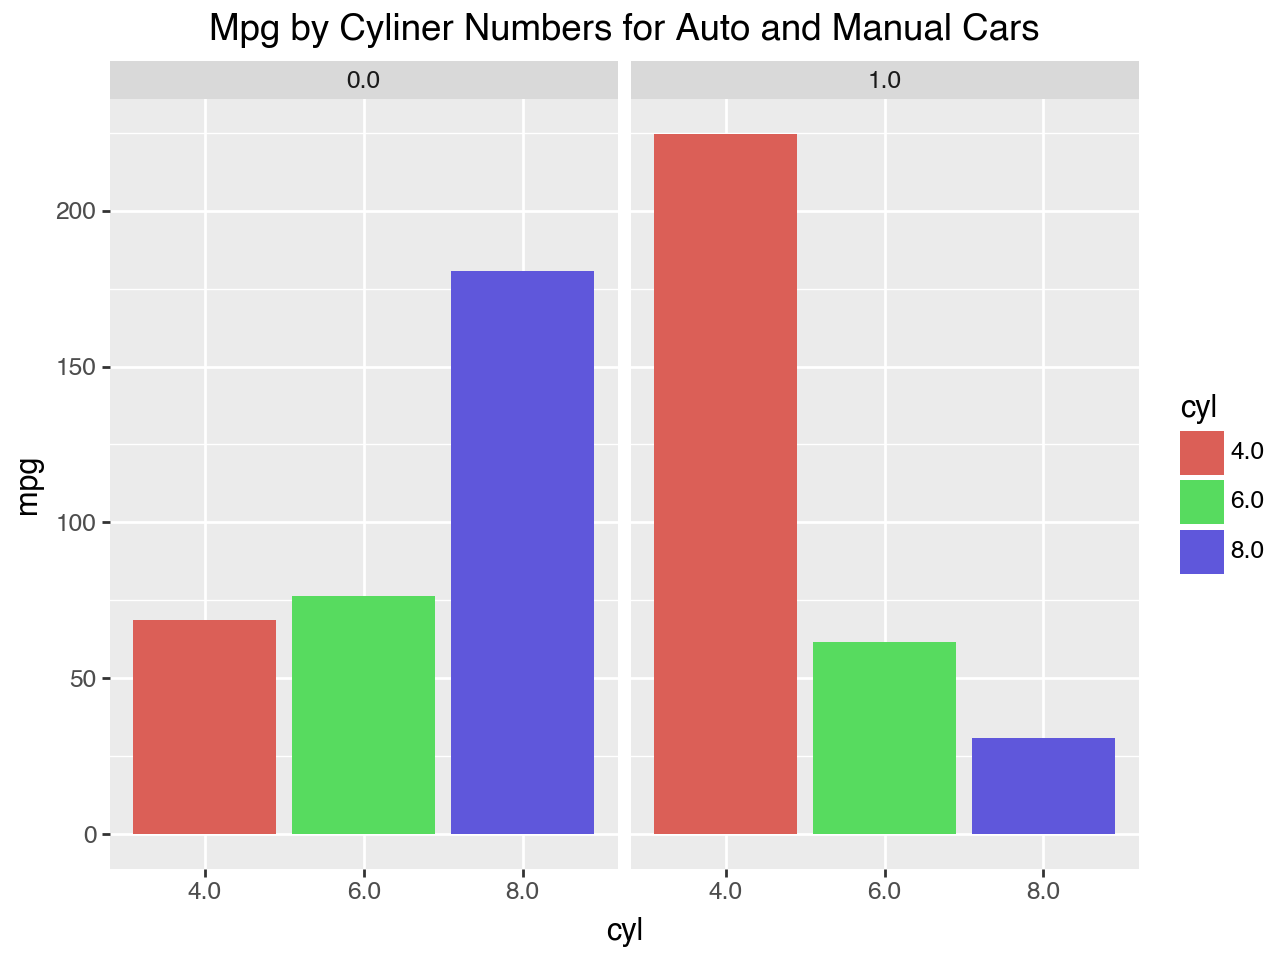

[<Figure Size: (640 x 480)>]

In [8]:
# Create plot with first new geometry here
df["cyl"] = df["cyl"].astype(str)
[(p9.ggplot(df)) + 
 (p9.aes(x="cyl",y="mpg",fill ="cyl")) + 
 (p9.geom_bar(stat='identity')) + 
 (p9.facet_wrap("am")) + 
 p9.ggtitle("Mpg by Cyliner Numbers for Auto and Manual Cars")
]

/opt/anaconda3/lib/python3.12/site-packages/IPython/lib/pretty.py:779: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


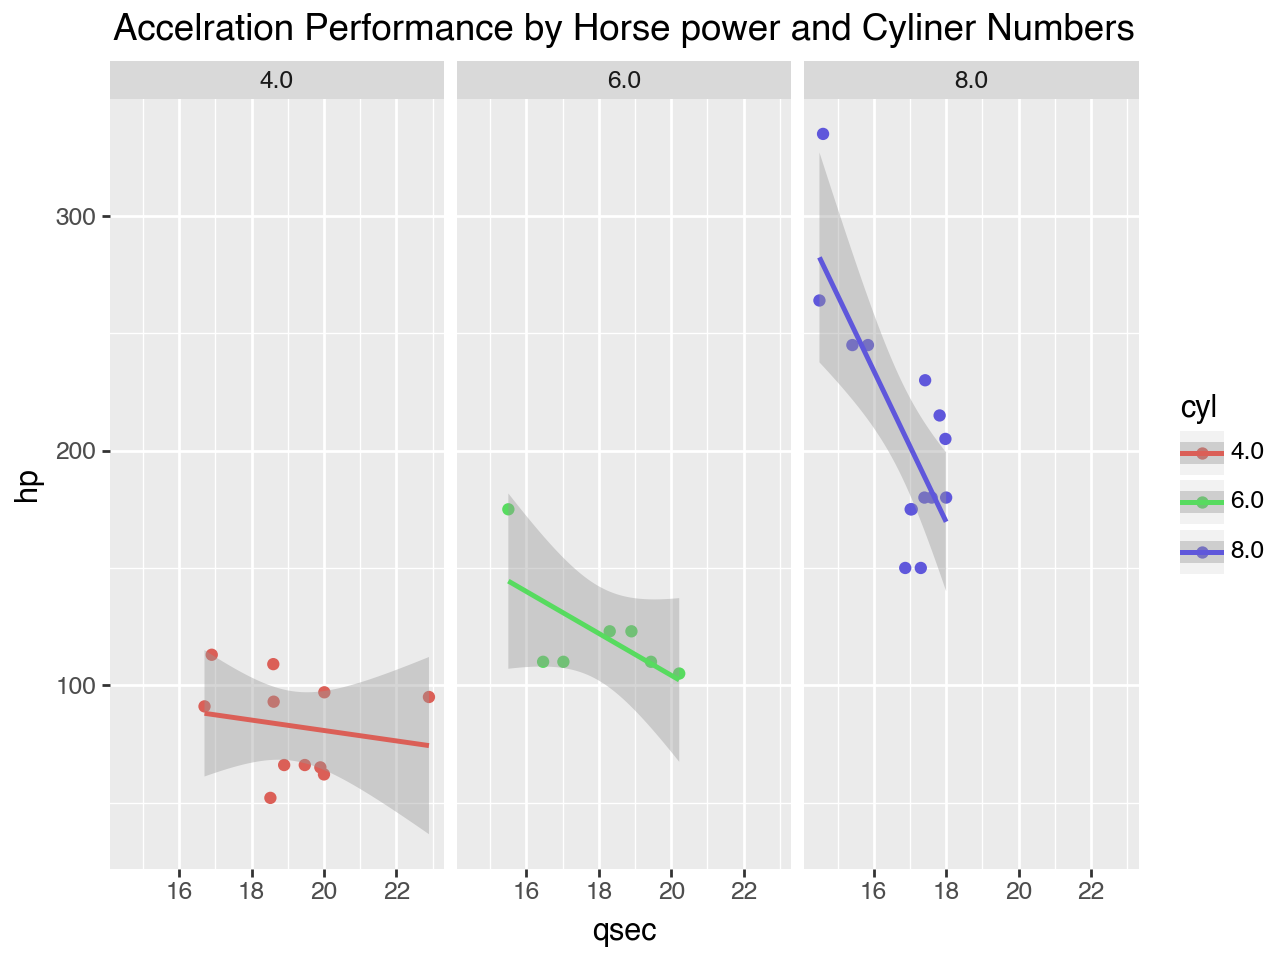

[<Figure Size: (640 x 480)>]

In [9]:
# Create plot with second new geometry here
[p9.ggplot(df) + p9.aes(x="qsec",y="hp",color="cyl") + 
 p9.geom_point() + 
 p9.facet_wrap("cyl") + 
 p9.stat_smooth(method="lm") +
 p9.ggtitle("Accelration Performance by Horse power and Cyliner Numbers")
]

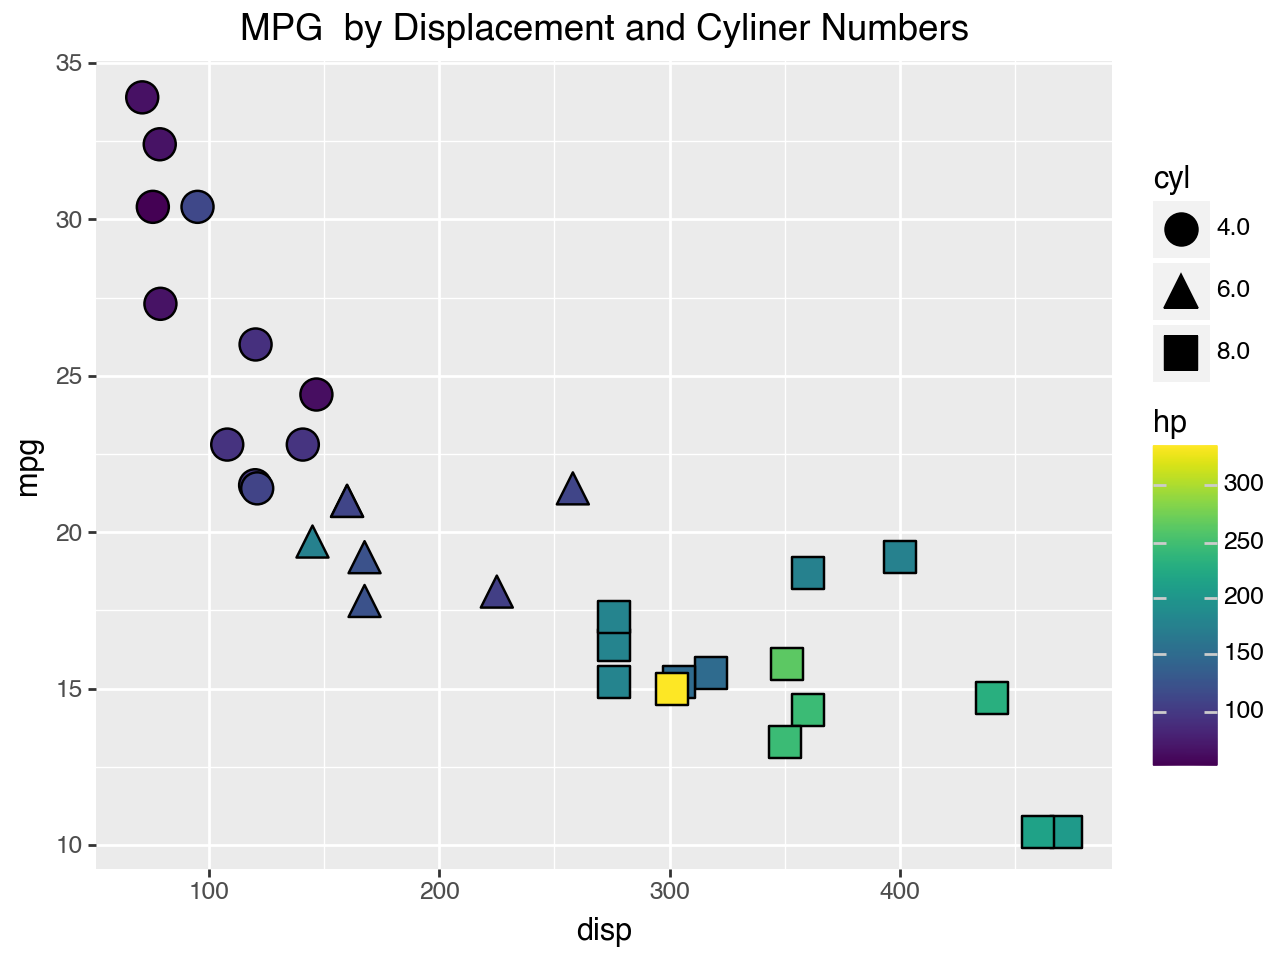

In [10]:
# Create plot with third new geometry here

p9.ggplot(df) + (p9.aes(x="disp",y="mpg",shape ="cyl",fill= "hp")) + (p9.geom_point(size = 6)) + p9.ggtitle("MPG  by Displacement and Cyliner Numbers")